In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"E:\Assignment\multidataset\Startups.csv",encoding='latin1')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.describe

<bound method NDFrame.describe of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Flori

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.isna().mean()

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

In [20]:
print(data.groupby('State').Profit.mean())

State
California    103905.175294
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64


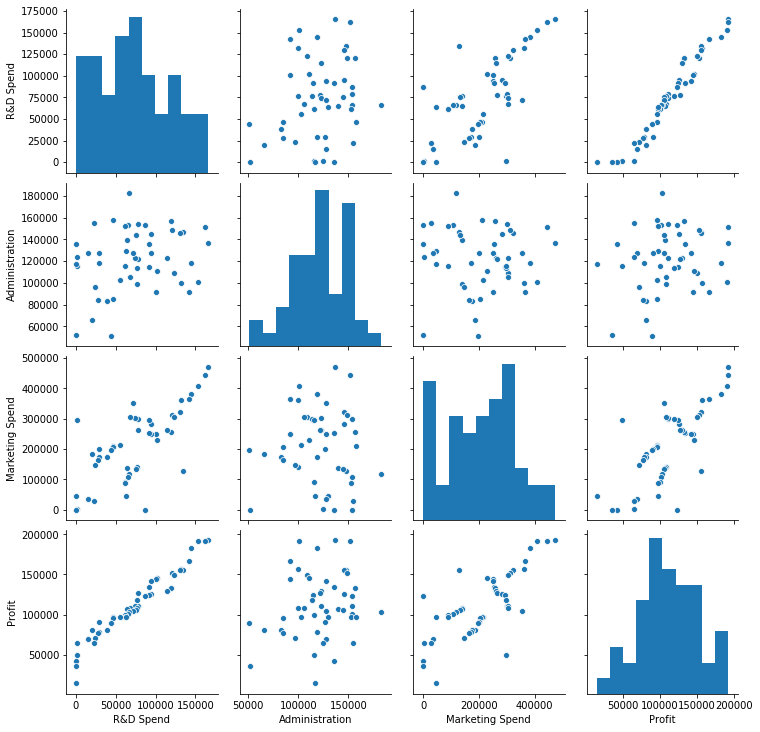

In [9]:
 sns.pairplot(data)

In [10]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [12]:
data.shape

(50, 5)

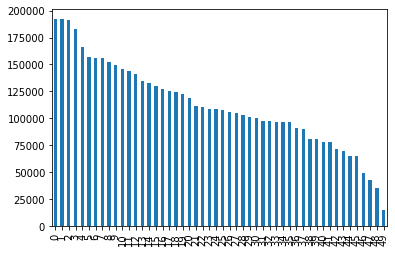

In [28]:
data[('Profit')].plot.bar()

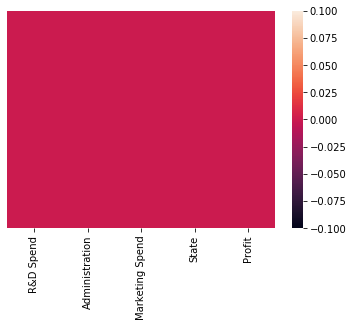

In [29]:
sns.heatmap(data.isna(),yticklabels=False)

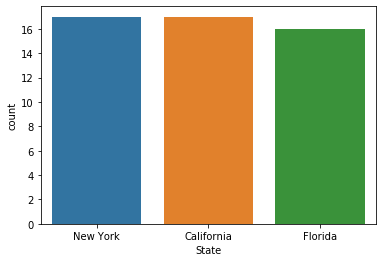

In [31]:
sns.countplot(x='State',data=data)

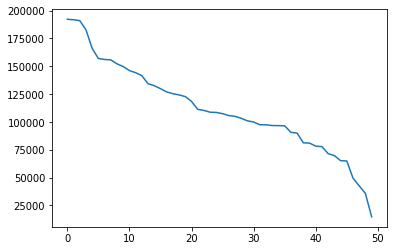

In [32]:
sns.lineplot(data=data.Profit)

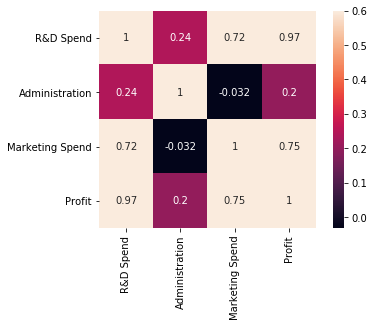

In [36]:
sns.heatmap(data.corr(),vmax=0.6, square=True, annot=True)

In [40]:
data.head(4)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,0,182901.99


In [41]:
X=data.iloc[:,:-1]

In [42]:
Y=data.iloc[:,-1]

In [43]:
data.State=pd.get_dummies(data.State,drop_first= True)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [46]:
X_train.shape

(40, 4)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model=LinearRegression()

In [49]:
model.fit(X_train,Y_train)

LinearRegression()

In [50]:
Y_predict=model.predict(X_test)

In [51]:
Y_predict

array([114492.48737172,  90390.92911032,  75772.52431972,  69998.05639156,
       179809.79887087, 171434.95009574,  49517.83035331, 102120.44927302,
        58604.74725527,  98113.95521445])

In [52]:
from sklearn.metrics import r2_score

In [53]:
score=r2_score(Y_test,Y_predict)

In [54]:
score

0.965027534375813

In [55]:
dt=pd.DataFrame({"Actual":Y_test,
              "Predicted":Y_predict} )

In [56]:
dt

,Actual,Predicted
27,105008.31,114492.487372
35,96479.51,90390.929110
40,78239.91,75772.524320
38,81229.06,69998.056392
2,191050.39,179809.798871
3,182901.99,171434.950096
48,35673.41,49517.830353
29,101004.64,102120.449273
46,49490.75,58604.747255
31,97483.56,98113.955214
